# Yelp business analysis

You can find the dataset at https://www.yelp.com/dataset

### This notebook will evaluate Yelp businesses through Machine Learning regressions, we will examine the following questions:

Does a high star rating correlate with the # of reviews?

Can we predict if a business is open based on how many reviews it has?

In [2]:
#take a look at the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [3]:
#Do we have any null data? No cleaning required
data.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64

In [3]:
#how long is our dataset?
len(data)

209393

In [4]:
#Average star rating of all businesses
data.stars.mean()    

3.5380552358483808

In [5]:
#Average number of reviews of all businesses
data.review_count.mean()

36.93750507419064

## Linear Regression

Does a high star rating correlate with the # of reviews?

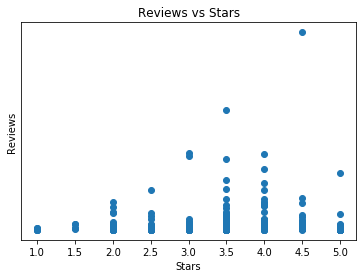

In [6]:
#defining variables from data
stars = data['stars']
reviews = data['review_count']

# Split the data into training/testing sets
X_train = stars[:-250]
X_test = stars[-250:]
Y_train = reviews[:-250]
Y_test = reviews[-250:]

# Plot outputs
plt.scatter(X_test, Y_test)
plt.title('Reviews vs Stars')
plt.xlabel('Stars')
plt.ylabel('Reviews')
plt.yticks(())

plt.show()

In [7]:
#adding constant to regression equation
x = sm.add_constant(stars)

#compute OLS regression and show statistics
results = sm.OLS(reviews,x).fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_count   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     526.5
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          2.26e-116
Time:                        12:55:21   Log-Likelihood:            -1.3051e+06
No. Observations:              209393   AIC:                         2.610e+06
Df Residuals:                  209391   BIC:                         2.610e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5848      0.969     16.088      0.000      13.686      17.483
stars          6.0352      0.263     22.946      0.000       5.520       6.551
==============================================================================
Omnibus:                   457177.179   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5465347421.661
Skew:                          19.594   Prob(JB):                         0.00
Kurtosis:                     793.497   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

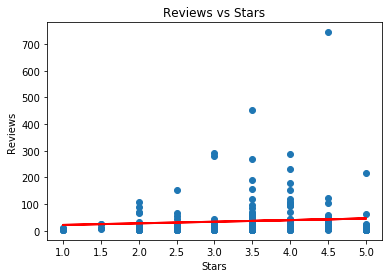

In [8]:
#Plotting the regression line
plt.scatter(X_test, Y_test)
 
#Regression line (values taken from coefficients above)
yhat = 6.0352*stars + 15.5848

#plotting line
fig = plt.plot(stars,yhat, lw=2, c='red', label = 'regression line')
plt.title('Reviews vs Stars')
plt.xlabel('Stars')
plt.ylabel('Reviews')
plt.show()

Given the high number of low-review businesses, there is a very small correlation between reviews and star ratings (low R-squared value).

However it is worth noting that high review outliers are more common in highly-rates businesses.

## Logistic Regression

Can we predict if a business is open based on how many reviews it has?
This will tell us if # of yelp ratings indicate business success

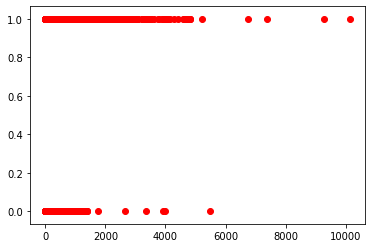

In [10]:
#defining variables from data
review_count = data['review_count']
is_open = data['is_open']

#graphing
plt.scatter(review_count, is_open, color='red')

^^at first glance, it seems that the high # of reviews (above 1800-2000) does make it more likely that the business is open  

In [15]:
#splitting data for regression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(review_count, is_open, test_size=0.1)

In [31]:
#fitting train data to model
model = LogisticRegression()

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
X_test = X_test.values.reshape(-1,1)

model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
#how good is our model
model.score(X_test, Y_test)

0.8066857688634193

^^our model is around 80% accurate

In [38]:
model.predict_proba(X_test)

array([[0.17809893, 0.82190107],
       [0.19616152, 0.80383848],
       [0.20161131, 0.79838869],
       ...,
       [0.20132167, 0.79867833],
       [0.20132167, 0.79867833],
       [0.20132167, 0.79867833]])

^^for lower review numbers there is between a 17.8%-20.1% probability of a business being open
for higher reviews, there is between a 79.8%-82.2% probabilty that a business will be open.